In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
import re
import nltk
import pymorphy2
import math
from matplotlib.ticker import MultipleLocator
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [3]:
temp = pd.read_excel('classified.xlsx')

In [11]:
diag = pd.read_csv('diag.csv')

C:\Users\artem\AppData\Local\Temp\ipykernel_23360\3285149881.py:1: DtypeWarning: Columns (7,8,9,13,22,23,38,39,48,56,63,70,107,110,150,151,152,153,154,155) have mixed types. Specify dtype option on import or set low_memory=False.
  diag = pd.read_csv('diag.csv')


In [12]:
merged_df = pd.merge(temp, diag[['№', 'ПБ']], left_on='Number', right_on='№', how='inner')
merged_df.drop('№', axis=1, inplace=True)
merged_df

,Number,Class,Sex,Rus,Math,Family,Region,History Knowledge Index,Family Life Index,Culture Index,ПБ
0,1964895,6,Девочки,3,3,Полная-немногодетная,Северо-Западный федеральный округ,2,2,3,10
1,1964302,6,Девочки,5,5,Многодетная-полная,Северо-Западный федеральный округ,2,2,3,13
2,1965852,6,Мальчики,4,4,Полная-немногодетная,Северо-Западный федеральный округ,2,3,3,11
3,1953331,6,Мальчики,3,3,Полная-немногодетная,Северо-Западный федеральный округ,2,2,2,10
4,1964793,6,Девочки,5,4,Полная-немногодетная,Северо-Западный федеральный округ,2,3,3,14
...,...,...,...,...,...,...,...,...,...,...,...
39255,2076893,8,Мальчики,4,4,Полная-немногодетная,Сибирский федеральный округ,3,3,3,15
39256,2077118,8,Девочки,4,5,Полная-немногодетная,Сибирский федеральный округ,2,2,3,11
39257,2077124,8,Мальчики,3,3,Полная-немногодетная,Сибирский федеральный округ,2,1,2,9
39258,2077150,8,Девочки,4,3,Полная-немногодетная,Сибирский федеральный округ,2,3,2,8


In [13]:
merged_df.loc[(merged_df['History Knowledge Index'] == 2) & (merged_df['Family Life Index'] == 1) & (merged_df['Culture Index'] == 2), ['History Knowledge Index', 'Family Life Index', 'Culture Index']] = [2, 2, 2]
merged_df.loc[(merged_df['History Knowledge Index'] == 2) & (merged_df['Family Life Index'] == 2) & (merged_df['Culture Index'] == 3), ['History Knowledge Index', 'Family Life Index', 'Culture Index']] = [2, 2, 2]

In [14]:
to_clust = merged_df[(merged_df['History Knowledge Index'] == 2) & (merged_df['Family Life Index'] == 2) & (merged_df['Culture Index'] == 2)]

In [20]:
label_encoder = LabelEncoder()
to_clust['SexCode'] = label_encoder.fit_transform(to_clust['Sex'])
to_clust['FamilyCode'] = label_encoder.fit_transform(to_clust['Family'])
categorical_features = ['SexCode', 'FamilyCode']
numerical_features = ['Rus', 'Math', 'ПБ']
scaler = StandardScaler()
X = to_clust[categorical_features + numerical_features]
X[numerical_features] = scaler.fit_transform(X[numerical_features])

C:\Users\artem\AppData\Local\Temp\ipykernel_23360\4235694342.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  to_clust['SexCode'] = label_encoder.fit_transform(to_clust['Sex'])
C:\Users\artem\AppData\Local\Temp\ipykernel_23360\4235694342.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  to_clust['FamilyCode'] = label_encoder.fit_transform(to_clust['Family'])
C:\Users\artem\AppData\Local\Temp\ipykernel_23360\4235694342.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from 

C:\Users\artem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\cluster\_kmeans.py:1420: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\Users\artem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\cluster\_kmeans.py:1420: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\Users\artem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\cluster\_kmeans.py:1420: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\Users\artem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\clu

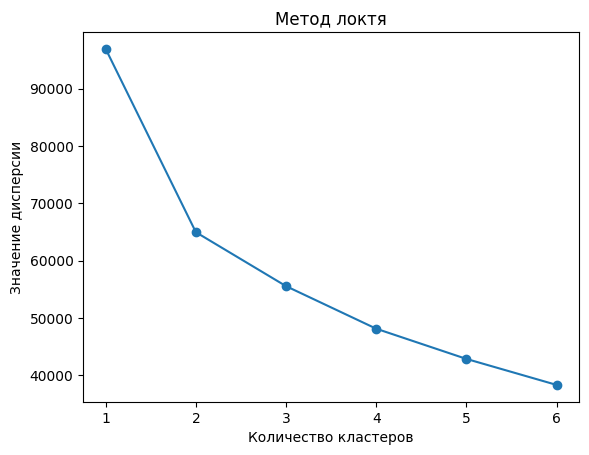

In [21]:
inertia = []
for n_clusters in range(1, 7):
    kmeans = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=100000, n_init=10, random_state=0, algorithm='full', tol=1e-4)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)
plt.plot(range(1, 7), inertia, marker='o')
plt.xlabel('Количество кластеров')
plt.ylabel('Значение дисперсии')
plt.title('Метод локтя')
plt.show()

([<matplotlib.axis.XTick at 0x154c8416df0>,
 [Text(0, 0, '2'),
  Text(1, 0, '3'),
  Text(2, 0, '4'),
  Text(3, 0, '5'),
  Text(4, 0, '6')])

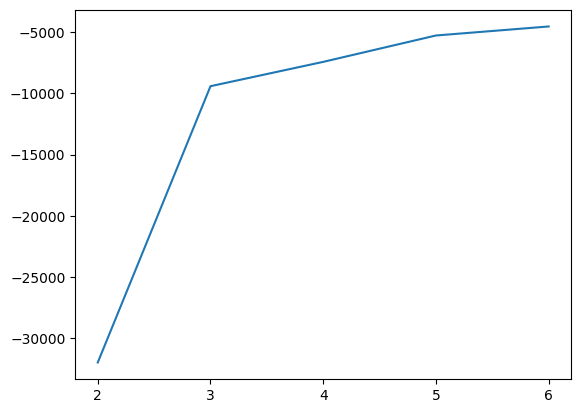

In [22]:
diff = np.diff(inertia)
plt.plot(diff)
plt.xticks(np.arange(0, 5), np.arange(2, 7))

([<matplotlib.axis.XTick at 0x154c8471c40>,
 [Text(0, 0, '2'), Text(1, 0, '3'), Text(2, 0, '4'), Text(3, 0, '5')])

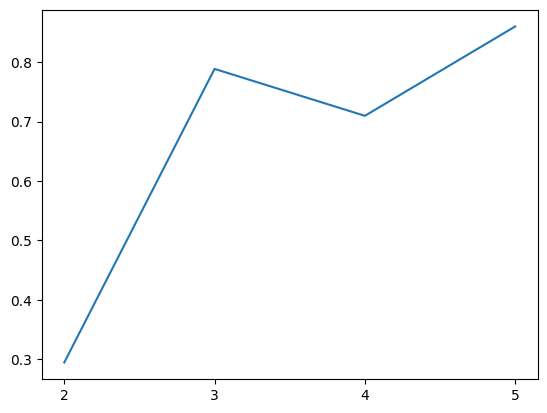

In [23]:
diff_r = diff[1:] / diff[:-1]

plt.plot(diff_r)
plt.xticks(np.arange(0, 4), np.arange(2, 6))

In [24]:
kmeans = KMeans(n_clusters=2, init='k-means++', max_iter=100000, n_init=10, random_state=0, algorithm='full', tol=1e-4)
to_clust['Cluster'] = kmeans.fit_predict(X)
to_clust

C:\Users\artem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\cluster\_kmeans.py:1420: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\Users\artem\AppData\Local\Temp\ipykernel_23360\825579236.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  to_clust['Cluster'] = kmeans.fit_predict(X)


,Number,Class,Sex,Rus,Math,Family,Region,History Knowledge Index,Family Life Index,Culture Index,ПБ,SexCode,FamilyCode,Cluster
0,1964895,6,Девочки,3,3,Полная-немногодетная,Северо-Западный федеральный округ,2,2,2,10,0,2,0
1,1964302,6,Девочки,5,5,Многодетная-полная,Северо-Западный федеральный округ,2,2,2,13,0,0,1
3,1953331,6,Мальчики,3,3,Полная-немногодетная,Северо-Западный федеральный округ,2,2,2,10,1,2,0
6,1963939,6,Мальчики,4,4,Неполная,Северо-Западный федеральный округ,2,2,2,14,1,1,1
7,1964625,6,Мальчики,4,4,Полная-немногодетная,Северо-Западный федеральный округ,2,2,2,12,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39251,2077625,8,Мальчики,4,4,Полная-немногодетная,Сибирский федеральный округ,2,2,2,7,1,2,1
39252,2076934,8,Девочки,3,3,Многодетная-полная,Сибирский федеральный округ,2,2,2,11,0,0,0
39256,2077118,8,Девочки,4,5,Полная-немногодетная,Сибирский федеральный округ,2,2,2,11,0,2,1
39257,2077124,8,Мальчики,3,3,Полная-немногодетная,Сибирский федеральный округ,2,2,2,9,1,2,0


In [25]:
cluster_counts = to_clust['Cluster'].value_counts()
cluster_counts

1    13785
0    11685
Name: Cluster, dtype: int64

In [26]:
temp.loc[(temp['History Knowledge Index'] == 2) & (temp['Family Life Index'] == 1) & (temp['Culture Index'] == 2), ['History Knowledge Index', 'Family Life Index', 'Culture Index']] = [2, 2, 2]
temp.loc[(temp['History Knowledge Index'] == 2) & (temp['Family Life Index'] == 2) & (temp['Culture Index'] == 3), ['History Knowledge Index', 'Family Life Index', 'Culture Index']] = [2, 2, 2]

In [27]:
temp.loc[(temp['History Knowledge Index'] == 2) & (temp['Family Life Index'] == 3) & (temp['Culture Index'] == 3), ['History Knowledge Index', 'Family Life Index', 'Culture Index']] = [3, 3, 3]

In [28]:
to_clust

,Number,Class,Sex,Rus,Math,Family,Region,History Knowledge Index,Family Life Index,Culture Index,ПБ,SexCode,FamilyCode,Cluster
0,1964895,6,Девочки,3,3,Полная-немногодетная,Северо-Западный федеральный округ,2,2,2,10,0,2,0
1,1964302,6,Девочки,5,5,Многодетная-полная,Северо-Западный федеральный округ,2,2,2,13,0,0,1
3,1953331,6,Мальчики,3,3,Полная-немногодетная,Северо-Западный федеральный округ,2,2,2,10,1,2,0
6,1963939,6,Мальчики,4,4,Неполная,Северо-Западный федеральный округ,2,2,2,14,1,1,1
7,1964625,6,Мальчики,4,4,Полная-немногодетная,Северо-Западный федеральный округ,2,2,2,12,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39251,2077625,8,Мальчики,4,4,Полная-немногодетная,Сибирский федеральный округ,2,2,2,7,1,2,1
39252,2076934,8,Девочки,3,3,Многодетная-полная,Сибирский федеральный округ,2,2,2,11,0,0,0
39256,2077118,8,Девочки,4,5,Полная-немногодетная,Сибирский федеральный округ,2,2,2,11,0,2,1
39257,2077124,8,Мальчики,3,3,Полная-немногодетная,Сибирский федеральный округ,2,2,2,9,1,2,0


In [29]:
to_clust['Cluster'] = to_clust['Cluster'].replace({0: 5, 1: 6})
to_clust

C:\Users\artem\AppData\Local\Temp\ipykernel_23360\3306920932.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  to_clust['Cluster'] = to_clust['Cluster'].replace({0: 5, 1: 6})


,Number,Class,Sex,Rus,Math,Family,Region,History Knowledge Index,Family Life Index,Culture Index,ПБ,SexCode,FamilyCode,Cluster
0,1964895,6,Девочки,3,3,Полная-немногодетная,Северо-Западный федеральный округ,2,2,2,10,0,2,5
1,1964302,6,Девочки,5,5,Многодетная-полная,Северо-Западный федеральный округ,2,2,2,13,0,0,6
3,1953331,6,Мальчики,3,3,Полная-немногодетная,Северо-Западный федеральный округ,2,2,2,10,1,2,5
6,1963939,6,Мальчики,4,4,Неполная,Северо-Западный федеральный округ,2,2,2,14,1,1,6
7,1964625,6,Мальчики,4,4,Полная-немногодетная,Северо-Западный федеральный округ,2,2,2,12,1,2,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39251,2077625,8,Мальчики,4,4,Полная-немногодетная,Сибирский федеральный округ,2,2,2,7,1,2,6
39252,2076934,8,Девочки,3,3,Многодетная-полная,Сибирский федеральный округ,2,2,2,11,0,0,5
39256,2077118,8,Девочки,4,5,Полная-немногодетная,Сибирский федеральный округ,2,2,2,11,0,2,6
39257,2077124,8,Мальчики,3,3,Полная-немногодетная,Сибирский федеральный округ,2,2,2,9,1,2,5


In [30]:
temp = pd.merge(temp, to_clust[['Number', 'Cluster']], on='Number', how='left')

In [31]:
temp.loc[(temp['History Knowledge Index'] == 1) & (temp['Family Life Index'] == 1) & (temp['Culture Index'] == 1), 'Cluster'] = 1
temp.loc[(temp['History Knowledge Index'] == 1) & (temp['Family Life Index'] == 2) & (temp['Culture Index'] == 1), 'Cluster'] = 2
temp.loc[(temp['History Knowledge Index'] == 2) & (temp['Family Life Index'] == 3) & (temp['Culture Index'] == 2), 'Cluster'] = 3
temp.loc[(temp['History Knowledge Index'] == 3) & (temp['Family Life Index'] == 3) & (temp['Culture Index'] == 3), 'Cluster'] = 4

In [32]:
temp.to_excel('clusters.xlsx')